In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sklearn
import seaborn as sns

In [8]:
file_path = "C:/Users/OWNER/Downloads/energydata_complete.xlsx"
("C:/Users/OWNER/Downloads/energydata_complete.xlsx")
print(f"{file_path}")
df = pd.read_excel("C:/Users/OWNER/Downloads/energydata_complete.xlsx")



C:/Users/OWNER/Downloads/energydata_complete.xlsx


In [10]:
energydata = pd.read_excel("C:/Users/OWNER/Downloads/energydata_complete.xlsx")

In [11]:
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [12]:
energydata.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [17]:
#rename columns
column_names = {'T1':'Temparature_in_kitchen','RH_1':'Humidity_in_Kitchen',
               'T2':'Temperature_in_living_room','RH_2':'Humidity_in_living_room',
                'T3':'Temperature_in_laundry_room','RH_3':'Humidity_in_laundry_room',
               'T4':'Temperature_in_office_room','RH_4':'Humidity_in_office_room',
                'T5':'Temperature_in_bathroom','RH_5':'Humidity_in_bathroom',
                'T6':'Temperature_outside_building','RH_6':'Humidity_outside_building',
               'T7':'Temperature_in_ironing_room','RH_7':'Humidity_in_ironing_room',
               'T8':'Temperature_in_teenager_room','RH_8':'Humidity_in_teenager_room',
               'T9':'Temperature_in_parents_room','RH':'Humidity_in_parents_room',
               'T_out':'Temperature_outside','Pressure_mm_hg':'Pressure',
               'RH_out':'Humidity_outside'}
df = df.rename(columns=column_names)

#select a sample of the dataset
simple_linear_reg_df = df[['Temperature_in_living_room','Temperature_outside_building']].sample(15, random_state=2)


In [18]:
df.head(10)

,date,Appliances,lights,Temparature_in_kitchen,Humidity_in_Kitchen,Temperature_in_living_room,Humidity_in_living_room,Temperature_in_laundry_room,Humidity_in_laundry_room,Temperature_in_office_room,...,Temperature_in_parents_room,RH_9,Temperature_outside,Press_mm_hg,Humidity_outside,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


<AxesSubplot:xlabel='Temperature_in_living_room', ylabel='Temperature_outside_building'>

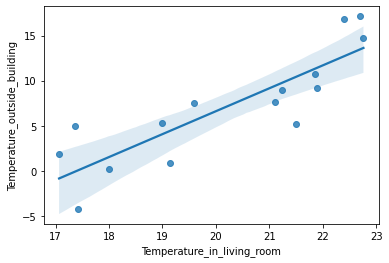

In [21]:
#linear regression plot

sns.regplot(x='Temperature_in_living_room', y = 'Temperature_outside_building', data = simple_linear_reg_df)

In [31]:
to_drop =['date','light']

In [14]:
import pandas as pd
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime(arg: 'DatetimeScalarOrArrayConvertible', errors: 'str' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool | None' = None, format: 'str | None' = None, exact: 'bool' = True, unit: 'str | None' = None, infer_datetime_format: 'bool' = False, origin='unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'>

In [19]:
!pip install sklearn

In [30]:
#firstly we normalise our dataset to a common scale using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Temperature_in_living_room', 'Temperature_outside_building'])
Appliances_target = normalised_df['Temperature_in_living_room']


TypeError: The DTypes <class 'numpy.dtype[int64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [35]:
#Question 12
features_df = normalised_df.drop(columns=['Temperature_in_living_room', 'Temperature_outside_building']
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, Appliances_target,
                                                   test_size=0.3, random_state=42)
linear_model = LinearRegression()
#fit gthe model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values =linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae,2)

SyntaxError: invalid syntax (Temp/ipykernel_7740/1305843479.py, line 4)